In [1]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# import file with data
data = pd.read_csv("./survey_data.csv")
data = data.iloc[:, 14:]
data = data.drop(data.iloc[:, 1:20],axis = 1)
data = data.drop(data.iloc[:, 2:8],axis = 1)
data = data.drop(data.iloc[:, 13:],axis = 1)
data = data.dropna()
total_resp = len(data)
data

,EMPLOYMENT.STATUS,SEEK.OPEN.SOURCE,USER.VALUES.STABILITY,USER.VALUES.INNOVATION,USER.VALUES.REPLICABILITY,USER.VALUES.COMPATIBILITY,USER.VALUES.SECURITY,USER.VALUES.COST,USER.VALUES.TRANSPARENCY,USER.VALUES.USER.EXPERIENCE,USER.VALUES.CUSTOMIZABILITY,USER.VALUES.SUPPORT,USER.VALUES.TRUSTED.PRODUCER
0,Employed part time,Always,Extremely important,Extremely important,Very important,Extremely important,Very important,Extremely important,Moderately important,Extremely important,Extremely important,Very important,Very important
3,Employed full time,Sometimes,Moderately important,Not at all important,Very important,Very important,Very important,Very important,Very important,Extremely important,Extremely important,Slightly important,Very important
4,Full time student,Always,Extremely important,Very important,Very important,Very important,Very important,Not at all important,Extremely important,Moderately important,Very important,Moderately important,Slightly important
6,Employed full time,Always,Extremely important,Moderately important,Moderately important,Extremely important,Extremely important,Very important,Extremely important,Very important,Extremely important,Not at all important,Moderately important
10,Full time student,Always,Very important,Moderately important,Moderately important,Very important,Extremely important,Moderately important,Extremely important,Very important,Very important,Moderately important,Extremely important
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,Employed part time,Sometimes,Moderately important,Moderately important,Moderately important,Moderately important,Moderately important,Slightly important,Moderately important,Very important,Moderately important,Moderately important,Moderately important
6025,Retired or permanently not working (e.g. due t...,Always,Extremely important,Moderately important,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Moderately important
6026,Employed full time,Always,Extremely important,Moderately important,Moderately important,Very important,Extremely important,Moderately important,Very important,Very important,Very important,Very important,Extremely important
6027,Employed full time,Always,Extremely important,Extremely important,Extremely important,Extremely important,Extremely important,Moderately important,Extremely important,Moderately important,Very important,Extremely important,Extremely important


In [3]:
data = data.replace(to_replace=['Extremely important', 'Very important', 'Moderately important', 'Slightly important', 'Not at all important'], value=[4, 3, 2, 1, 0])
data 

,EMPLOYMENT.STATUS,SEEK.OPEN.SOURCE,USER.VALUES.STABILITY,USER.VALUES.INNOVATION,USER.VALUES.REPLICABILITY,USER.VALUES.COMPATIBILITY,USER.VALUES.SECURITY,USER.VALUES.COST,USER.VALUES.TRANSPARENCY,USER.VALUES.USER.EXPERIENCE,USER.VALUES.CUSTOMIZABILITY,USER.VALUES.SUPPORT,USER.VALUES.TRUSTED.PRODUCER
0,Employed part time,Always,4,4,3,4,3,4,2,4,4,3,3
3,Employed full time,Sometimes,2,0,3,3,3,3,3,4,4,1,3
4,Full time student,Always,4,3,3,3,3,0,4,2,3,2,1
6,Employed full time,Always,4,2,2,4,4,3,4,3,4,0,2
10,Full time student,Always,3,2,2,3,4,2,4,3,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,Employed part time,Sometimes,2,2,2,2,2,1,2,3,2,2,2
6025,Retired or permanently not working (e.g. due t...,Always,4,2,4,4,4,4,4,4,4,4,2
6026,Employed full time,Always,4,2,2,3,4,2,3,3,3,3,4
6027,Employed full time,Always,4,4,4,4,4,2,4,2,3,4,4


In [4]:
df_employed_full = data[data['EMPLOYMENT.STATUS'] == 'Employed full time'] 
df_employed_part = data[data['EMPLOYMENT.STATUS'] == 'Employed part time'] 
df_student = data[data['EMPLOYMENT.STATUS'] == 'Full time student'] 
df_temp_not_working = data[data['EMPLOYMENT.STATUS'] == 'Temporarily not working'] 
df_retired = data[data['EMPLOYMENT.STATUS'] == 'Retired or permanently not working (e.g. due to disability)'] 
df_others = data[data['EMPLOYMENT.STATUS'] == 'Other - please describe'] 
total_resp_after_split = len(df_employed_full)+len(df_employed_part)+len(df_student)+len(df_temp_not_working)+len(df_retired)+len(df_others)
if total_resp_after_split != total_resp:
    print('Missing responses after splitting')
    
adoption_statistic_employed_full = {'Always':0, 'Sometimes':0, 'Rarely':0, 'Never': 0}
adoption_statistic_employed_part = {'Always':0, 'Sometimes':0, 'Rarely':0, 'Never': 0}
adoption_statistic_student = {'Always':0, 'Sometimes':0, 'Rarely':0, 'Never': 0}
adoption_statistic_temp_not_working = {'Always':0, 'Sometimes':0, 'Rarely':0, 'Never': 0}
adoption_statistic_retired = {'Always':0, 'Sometimes':0, 'Rarely':0, 'Never': 0}

df_employed_full_arr = np.array(df_employed_full)
df_employed_part_arr = np.array(df_employed_part)
df_student_arr = np.array(df_student)
df_temp_not_working_arr = np.array(df_temp_not_working)
df_retired_arr = np.array(df_retired)


In [5]:
for row in df_employed_full_arr:
    adoption_statistic_employed_full[row[1]] += 1
    
for row in df_employed_part_arr:
    adoption_statistic_employed_part[row[1]] += 1
    
for row in df_student_arr:
    adoption_statistic_student[row[1]] += 1
    
for row in df_temp_not_working_arr:
    adoption_statistic_temp_not_working[row[1]] += 1
    
for row in df_retired_arr:
    adoption_statistic_retired[row[1]] += 1

In [6]:
all_adoption = []
employed_full_list = ['Employed full time']
sum_employed_full = sum(adoption_statistic_employed_full.values())
for key, value in adoption_statistic_employed_full.items():
    employed_full_list.append(round(value/sum_employed_full, 2))
all_adoption.append(employed_full_list)  

employed_part_list = ['Employed part time']
sum_employed_part = sum(adoption_statistic_employed_part.values())
for key, value in adoption_statistic_employed_part.items():
    employed_part_list.append(round(value/sum_employed_part, 2))
all_adoption.append(employed_part_list)  

student_list = ['Full time student']
sum_student = sum(adoption_statistic_student.values())
for key, value in adoption_statistic_student.items():
    student_list.append(round(value/sum_student, 2))
all_adoption.append(student_list)  

not_working_list = ['Temporarily not working']
sum_not_working = sum(adoption_statistic_temp_not_working.values())
for key, value in adoption_statistic_temp_not_working.items():
    not_working_list.append(round(value/sum_not_working, 2))
all_adoption.append(not_working_list)  

retired_list = ['Retired or permanently not working']
sum_retired = sum(adoption_statistic_retired.values())
for key, value in adoption_statistic_retired.items():
    retired_list.append(round(value/sum_retired, 2))
all_adoption.append(retired_list)  


In [7]:
#define header names
col_names = ["People Group", "Always", "Sometimes", "Rarely", "Never"]
  
#display table
print(tabulate(all_adoption, headers=col_names, tablefmt="fancy_grid"))


╒════════════════════════════════════╤══════════╤═════════════╤══════════╤═════════╕
│ People Group                       │   Always │   Sometimes │   Rarely │   Never │
╞════════════════════════════════════╪══════════╪═════════════╪══════════╪═════════╡
│ Employed full time                 │     0.79 │        0.2  │     0.01 │    0    │
├────────────────────────────────────┼──────────┼─────────────┼──────────┼─────────┤
│ Employed part time                 │     0.78 │        0.22 │     0    │    0    │
├────────────────────────────────────┼──────────┼─────────────┼──────────┼─────────┤
│ Full time student                  │     0.6  │        0.34 │     0.05 │    0.01 │
├────────────────────────────────────┼──────────┼─────────────┼──────────┼─────────┤
│ Temporarily not working            │     0.68 │        0.29 │     0.04 │    0    │
├────────────────────────────────────┼──────────┼─────────────┼──────────┼─────────┤
│ Retired or permanently not working │     0.81 │        0.18 │  

In [24]:
user_values = np.array(data.mean(numeric_only=True).keys())
y_values = np.arange(1,12)
color_list = ['red', 'blue', 'black', 'green', 'pink']
employed_full_mean = df_employed_full.mean(numeric_only=True).values
employed_full_std = df_employed_full.std(numeric_only=True).values

employed_part_mean = df_employed_part.mean(numeric_only=True).values
employed_part_std = df_employed_part.std(numeric_only=True).values

student_mean = df_student.mean(numeric_only=True).values
student_std = df_student.std(numeric_only=True).values

not_working_mean = df_temp_not_working.mean(numeric_only=True).values
not_working_std = df_temp_not_working.std(numeric_only=True).values

retired_mean = df_retired.mean(numeric_only=True).values
retired_std = df_retired.std(numeric_only=True).values

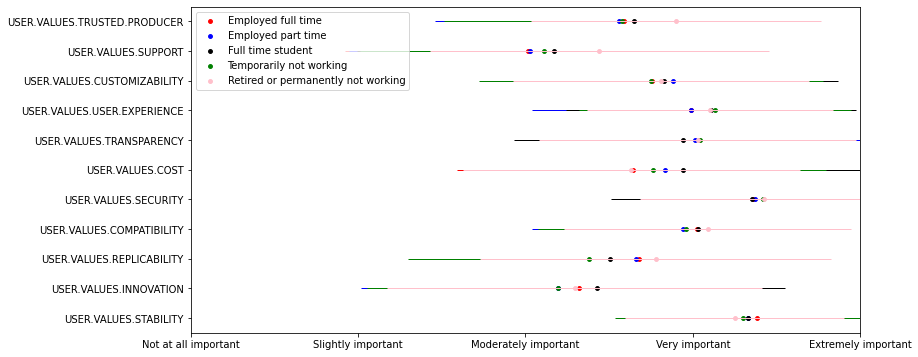

In [27]:
fig, ax = plt.subplots(1,1) 
fig.set_figheight(6)
fig.set_figwidth(12)
y_ticks_labels = user_values
x_ticks_labels = ['Not at all important', 'Slightly important', 'Moderately important', 'Very important', 'Extremely important']
ax.set_yticks(y_values)
ax.set_xticks([0,1,2,3,4])
ax.set_yticklabels(y_ticks_labels, fontsize=10)
ax.set_xticklabels(x_ticks_labels, fontsize=10)

ax.scatter(employed_full_mean, y_values, color = 'red', label = 'Employed full time', s=15)
for y_v, mean, std in zip(y_values, employed_full_mean, employed_full_std):
    ax.hlines(y=y_v, xmin=mean-std, xmax=mean+std, color="red", linewidth=1)
    
ax.scatter(employed_part_mean, y_values, color = 'blue', label = 'Employed part time', s=15)
for y_v, mean, std in zip(y_values, employed_part_mean, employed_part_std):
    ax.hlines(y=y_v, xmin=mean-std, xmax=mean+std, color="blue", linewidth=1)    

ax.scatter(student_mean, y_values, color = 'black', label = 'Full time student', s=15)
for y_v, mean, std in zip(y_values, student_mean, student_std):
    ax.hlines(y=y_v, xmin=mean-std, xmax=mean+std, color="black", linewidth=1)
    
ax.scatter(not_working_mean, y_values, color = 'green', label = 'Temporarily not working', s=15)
for y_v, mean, std in zip(y_values, not_working_mean, not_working_std):
    ax.hlines(y=y_v, xmin=mean-std, xmax=mean+std, color="green", linewidth=1)
    
ax.scatter(retired_mean, y_values, color = 'pink', label = 'Retired or permanently not working', s=15)
for y_v, mean, std in zip(y_values, retired_mean, retired_std):
    ax.hlines(y=y_v, xmin=mean-std, xmax=mean+std, color="pink", linewidth=1)    
    
ax.set_xlim(0, 4)
ax.legend()
plt.savefig('./user_values.png')
plt.show()